# UGrid variable basics

This is the basic introduction for using the `ugridpy` library.

`ugridpy` can be used for reading variable information from UGrid files. 

At the very beginning, the necessary libraries have to be imported.

In [1]:
from ugrid import UGrid, UGridMesh1D
from ugrid.version import __version__
__version__

'0.8.0'

Other imports

In [2]:
import numpy as np

## Reading topology's attributes names and values

In [3]:
with UGrid("./data_examples/OneMesh2D.nc", "r") as ug:
    # 1. Get the mesh2d name. This is also the name of a variable 
    variable_name = ug.mesh2d_get(0).name
    # 2. Get the mesh2D attribute names
    attribute_names = ug.variable_get_attributes_names(variable_name)
    # 3. Get the mesh2D attribute values
    attribute_values = ug.variable_get_attributes_values(variable_name)

### Create a dictionary of topology attributes names and values. This dictionary can be used for reading the file content with other libraries (xarray)

In [4]:
variable_attributes = {name:value for (name,value) in zip(attribute_names,attribute_values) }
print(variable_attributes)

{'cf_role': 'mesh_topology', 'edge_coordinates': 'mesh2d_edge_x mesh2d_edge_y', 'edge_dimension': 'mesh2d_nEdges', 'edge_node_connectivity': 'mesh2d_edge_nodes', 'face_coordinates': 'mesh2d_face_x mesh2d_face_y', 'face_dimension': 'mesh2d_nFaces', 'face_node_connectivity': 'mesh2d_face_nodes', 'long_name': 'Topology data of 2D mesh', 'max_face_nodes_dimension': 'mesh2d_nMax_face_nodes', 'node_coordinates': 'mesh2d_node_x mesh2d_node_y', 'node_dimension': 'mesh2d_nNodes', 'topology_dimension': '2'}


## Reading another variable attribute's names and values

### In this case the attribute flag_values contains multiple values

In [5]:
with UGrid("./data_examples/OneMesh2D.nc", "r") as ug:
    # 1. Get the mesh2d name. This is also the name of a variable 
    variable_name = "mesh2d_edge_type"
    # 2. Get the mesh2D attribute names
    attribute_names = ug.variable_get_attributes_names(variable_name)
    # 3. Get the mesh2D attribute values
    attribute_values = ug.variable_get_attributes_values(variable_name)

In [6]:
variable_attributes = {name:value for (name,value) in zip(attribute_names,attribute_values) }
print(variable_attributes)

{'_FillValue': '-999', 'coordinates': 'mesh2d_edge_x mesh2d_edge_y', 'flag_meanings': 'internal_closed internal boundary boundary_closed', 'flag_values': '0 1 2 3', 'location': 'edge', 'long_name': 'edge type (relation between edge and flow geometry)', 'mesh': 'mesh2d'}


## Reading data variable from a NetCDF file

In [7]:
with UGrid("./data_examples/ADH_SanDiego.nc", "r") as ug:
    depth = ug.variable_get_data_double("depth")
    node_x = ug.variable_get_data_double("node_x")
    node_y = ug.variable_get_data_double("node_y")

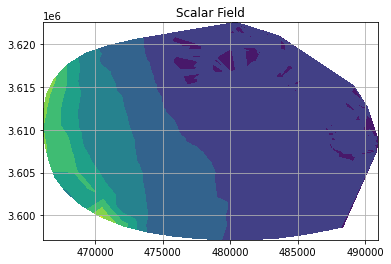

In [8]:
import numpy as np
import matplotlib.pyplot as plt
  
# Plotting scalar field with tricontour
plt.tricontourf(node_x, node_y, depth[:9140])
plt.title('Scalar Field')
  
# Show plot with gird
plt.grid()